In [1]:
#3 Observations
#Observation 1: Most of the rides taken were in urban regions.
#Observation 2: The cost of a ride in rural areas is significantly higher.
#Observation 3: Rides in urban areas garner the most total revenue.


In [170]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
OurCityData = "data/city_data.csv"
OurRideData = "data/ride_data.csv"

# Read the City and Ride Data
lset = pd.read_csv(OurCityData)
rset = pd.read_csv(OurRideData)

# Combine the data into a single dataset
superset = lset.merge(rset)

# Display the data table for preview
superset

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

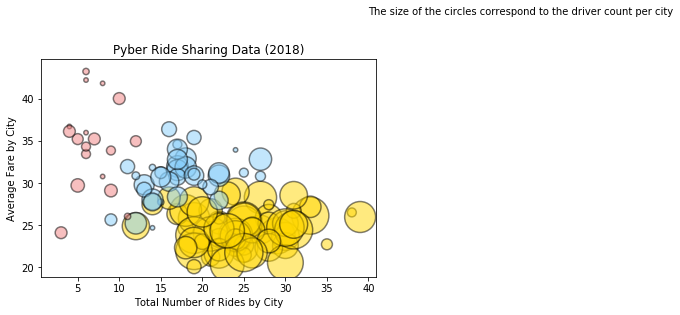

In [171]:
#Means
mu = superset.groupby("city")["fare"].mean()

#Totals
total_c = superset.groupby("city")["ride_id"].count()
total_d = superset.groupby("city")["driver_count"].mean()
city_c = lset.set_index('city')['type']

#A New DataFrame
cityframe = pd.DataFrame({"Average Fare":mu, "Number of Rides": total_c, "Number of Drivers": total_d, "City Type": city_c})

#Categories
urb = cityframe.loc[cityframe["City Type"]== "Urban"]
sub = cityframe.loc[cityframe["City Type"]== "Suburban"]
rur = cityframe.loc[cityframe["City Type"]== "Rural"]

#Scatterplot Setup
plt.scatter(urb["Number of Rides"], urb["Average Fare"], color = "gold", edgecolors="black", s = urb["Number of Drivers"]*20, label = "Urban", alpha = 0.5, linewidth = 1.5)
plt.scatter(sub["Number of Rides"], sub["Average Fare"], color = "lightskyblue", edgecolors ="black", s = sub["Number of Drivers"]*20, label = "Suburban", alpha = 0.5, linewidth = 1.5)
plt.scatter(rur["Number of Rides"], rur["Average Fare"], color = "lightcoral", edgecolors = "black", s = rur["Number of Drivers"]*20, label = "Rural", alpha = 0.5, linewidth = 1.5)

#Legend Setup
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Number of Rides by City")
plt.ylabel("Average Fare by City")

#Side Note
plt.text(40, 50,"The size of the circles correspond to the driver count per city")

#Save
plt.savefig('Figures/Figure_1.png')

#Show
plt.show()

## Total Fares by City Type

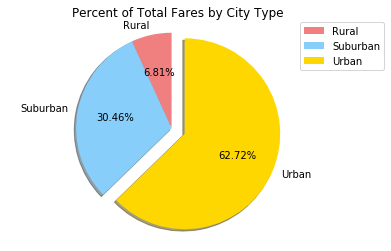

In [172]:
#Total
sigma = superset.groupby(["type"])["fare"].sum()

#Index for labels
sigma.index

#Pie Chart Construction
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0,0, 0.15)
plt.title('Percent of Total Fares by City Type')
plt.pie(sigma, labels = sigma.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 90)
plt.axis("equal")

#Legend
plt.legend(bbox_to_anchor=(0.85,1.025))

#Save
plt.savefig('Figures/Figure_2.png')

#Show
plt.show()

## Total Rides by City Type

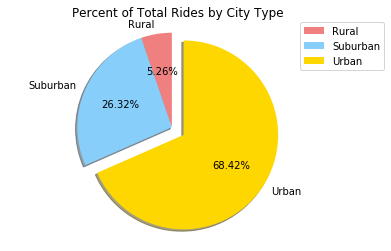

In [173]:
#Total
sigma_2 = superset.groupby(["type"])["ride_id"].count()

#Index for labels
sigma_2.index

#Pie Chart Construction
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0, 0, 0.15)
plt.title('Percent of Total Rides by City Type')
plt.pie(sigma_2, labels = sigma_2.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 90)
plt.axis("equal")

#Legend
plt.legend(bbox_to_anchor=(0.85,1.025))

#Save
plt.savefig('Figures/Figure_3.png')

#Show
plt.show()

## Total Drivers by City Type

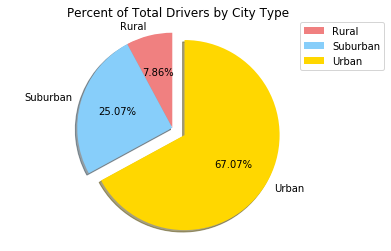

In [174]:
#Total
sigma_3 = superset.groupby(["type"])["driver_count"].mean()

#Index for labels
sigma_3.index

#Pie Chart Construction
colors = ["lightcoral", "lightskyblue", "gold"]
explode = (0, 0, 0.15)
plt.title('Percent of Total Drivers by City Type')
plt.pie(sigma_3, labels = sigma_3.index, autopct = "%1.2f%%", colors = colors, explode = explode, shadow = True, startangle = 90)

#Legend
plt.legend(bbox_to_anchor=(0.85,1.025))
plt.axis("equal")

#Save
plt.savefig('Figures/Figure_4.png')

#Show
plt.show()
